In [11]:
import os
import pandas as pd
from pandas import read_excel as read
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import string
# enable plots in the notebook
%matplotlib inline 

In [2]:
## Set working directory
os.chdir('../') # move dir back one 
current = os.getcwd() # get current dir
print "Moved Working directory back  %s" % current # check current dir


path = current+'\\database\\sidis\\expdata\\'
os.chdir(path) # one dir back
# Check 
newDir = os.getcwd() # get current dir
print "Working directory for data %s" % newDir # check current dir

## Grabing list of files
data=os.listdir('./') # list all files in dir
data=[files for files in data if files.endswith('.xlsx') and not files.startswith('~')] # list of COMPASS data
print "Data files retrieved %s" % data

Moved Working directory back  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python
Working directory for data E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\database\sidis\expdata
Data files retrieved ['1000.xlsx', '1001.xlsx', '1002.xlsx', '1003.xlsx', '1004.xlsx', '1005.xlsx', '1006.xlsx', '1007.xlsx', '2000.xlsx', '2001.xlsx', '2002.xlsx', '5001.xlsx', '5002.xlsx']


In [3]:
## Reading and resructuring data

data5001 = df(read(data[-2]))

# Calculate mesurment error
data5001["delta"] = (data5001["stat_u"]**2.0+data5001["sys_u"]**2.0)**(1/2.0)

##Binning data
xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4]
Q2Bin=[1,1.7,3,7,16,81]

data5001['xClas'] = pd.cut(data5001['x'], xBin, labels=map(chr, range(97, 97+len(xBin)-1)))
data5001['xBin'] = pd.cut(data5001['x'], xBin)

data5001['Q2Clas'] = pd.cut(data5001['Q2'], Q2Bin, labels=map(chr, range(65, 65+len(Q2Bin)-1)))
data5001['Q2Bin'] = pd.cut(data5001['Q2'], Q2Bin)

#print "x bins \n%s \n%s\n Q2 bins \n%s \n%s" \
#    %(pd.value_counts(data5001['xBin']),pd.value_counts(data5001['xClas']), \
#      pd.value_counts(data5001['Q2Bin']),pd.value_counts(data5001['Q2Clas']))

print data5001.head()

   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719  0.3126   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175  0.3135   
2    160  0.157  20.0  0.439  0.2  0.360555  0.13  M_Compass  5.0537  0.2711   
3    160  0.157  20.0  0.439  0.2  0.400000  0.16  M_Compass  4.8854  0.2244   
4    160  0.157  20.0  0.439  0.2  0.424264  0.18  M_Compass  4.1757  0.2275   

    sys_u    target hadron      col     delta xClas         xBin Q2Clas  \
0  0.1051  deuteron    pi+  compass  0.329795     g  (0.1, 0.21]      E   
1  0.1047  deuteron    pi+  compass  0.330521     g  (0.1, 0.21]      E   
2  0.1070  deuteron    pi+  compass  0.291452     g  (0.1, 0.21]      E   
3  0.1067  deuteron    pi+  compass  0.248476     g  (0.1, 0.21]      E   
4  0.1101  deuteron    pi+  compass  0.252741     g  (0.1, 0.21]      E   

          Q2Bin  
0  (16.0, 81.0]  
1  (16.0, 81.0]  
2  (16.0, 81.0

In [13]:
## Seting perameters
#xbins=a:h;Q2bins=A:E
groups=[['a','A'],['a','B'], ['b','A'], ['b','B'], ['c','A'], ['c','B'], ['c','C'], ['d','A'], ['d','B'], ['d','C'], ['e','A'],
        ['e','B'], ['e','C'], ['e','D'], ['f','B'], ['f','C'], ['f','D'], ['g','C'], ['g','D'], ['g','E'], ['h','D'], ['h','E']]
z=[0.2,0.3,0.4,0.6]
xlim,Q2lim=[0.0,0.4],[0.0,81.0]
gridmap=[6,7,12,13,14,15,18,19,20,21,22,24,25,26,27,28,29,32,33,34,35,36] #map of ith subplots on 5x8 grid
shairYax=[6,12,18,24,32] #Subplots with y-axes ticks
shairXax=[15,22,29,32,33,34,35,36] #Subplots with x-axes ticks
Zcolor=["red","green","blue","orange"]

In [5]:
## testing
for group,grid in zip(range(len(groups)),gridmap):
    print groups[group][0]
    print groups[group][1]
    print grid
#for group in range(len(groups)):
#    print groups[group][0]
#    print groups[group][1]

a
A
6
a
B
7
b
A
12
b
B
13
c
A
14
c
B
15
c
C
18
d
A
19
d
B
20
d
C
21
e
A
22
e
B
24
e
C
25
e
D
26
f
B
27
f
C
28
f
D
29
g
C
32
g
D
33
g
E
34
h
D
35
h
E
36


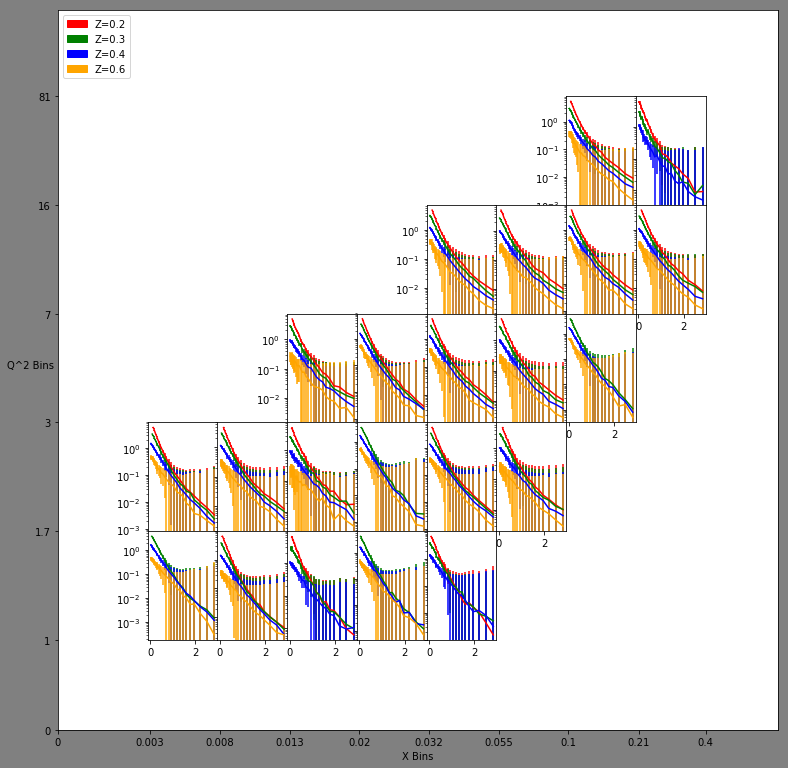

In [14]:
## Ploting
fig=plt.figure(figsize=(10, 10),facecolor="gray") # figsize=wxh in inches

globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) #the axis to put subplot grid in
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) #subplot grid

# Set custom ticks
ax=fig.add_axes([0,0,1,1])
ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805])
ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9])
ax.set_yticklabels([0]+Q2Bin)
ax.set_xticklabels([0]+xBin)

# Set title and axis labels
#ax.title("COMPASS Data")
ax.set_ylabel("Q^2 Bins",rotation="horizontal")
ax.set_xlabel("X Bins")

# Set legend
Zpatch1 = mpatches.Patch(color='red', label='Z=0.2')
Zpatch2 = mpatches.Patch(color='green', label='Z=0.3')
Zpatch3 = mpatches.Patch(color='blue', label='Z=0.4')
Zpatch4 = mpatches.Patch(color='orange', label='Z=0.6')
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4],loc='upper left')

for group,grid in zip(range(len(groups)),gridmap):
    data_bin=data5001.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1]))
    k=0 #counter
    for i in z:
        ax = fig.add_subplot(innerGrid[grid])
        ax.set_yscale("log")
        ax.errorbar(data_bin.pT2[data_bin.z==i],data_bin.value[data_bin.z==i],
                   data_bin.delta[data_bin.z==i],color=Zcolor[k])
        if grid not in shairYax:
            ax.set_yticklabels('')
        if grid not in shairXax:
            ax.set_xticklabels('')
        k+=1 #add one to counter

